In [5]:
import pandas as pd
import numpy as np

#extraction
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine_data=pd.read_csv(wine_url,header=None)

wine_quality_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_quality_data = pd.read_csv(wine_quality_url, sep=";")

#checking for data print

print(wine_data.head())
print(wine_quality_data.head())

# Transformation
# Assigning  column name
wine_data.columns = ['class', 'alcohol', 'malic acid', 'ash',
                     'alcalinity of ash', 'magnesium', 'total phenols',
                     'flavonoids', 'nonflavonoid phenols', 'proanthocyanidins',
                     'color intensity', 'hue', 'OD280/OD315 of diluted wines',
                     'proline']


#converting class type to categoric type
wine_data['class']=wine_data['class'].astype('category')

# check for null value

print(wine_data.isnull().sum())
print(wine_quality_data.isnull().sum())

# Normalazation
wine_data['alcohol'] = (wine_data['alcohol'] - wine_data['alcohol'].min()) / (wine_data['alcohol'].max() - wine_data['alcohol'].min())

# Creating an average quality column in wine_quality_data
wine_quality_data['average_quality'] = wine_quality_data[['fixed acidity', 'volatile acidity', 'citric acid',
                                                          'residual sugar', 'chlorides', 'free sulfur dioxide',
                                                          'total sulfur dioxide', 'density', 'pH', 'sulphates',
                                                          'alcohol']].mean(axis = 1)

# Creating a 'quality_label' column based on 'average_quality'
wine_quality_data['quality_label'] = pd.cut(wine_quality_data['average_quality'], bins=[0, 5, 7, np.inf], 
                                            labels = ['low', 'medium', 'high'])
# Loading
# Saving the transformed data as a csv file
wine_data.to_csv('wine_dataset.csv', index = False)
wine_quality_data.to_csv('wine_quality_dataset.csv', index = False) 





   0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9

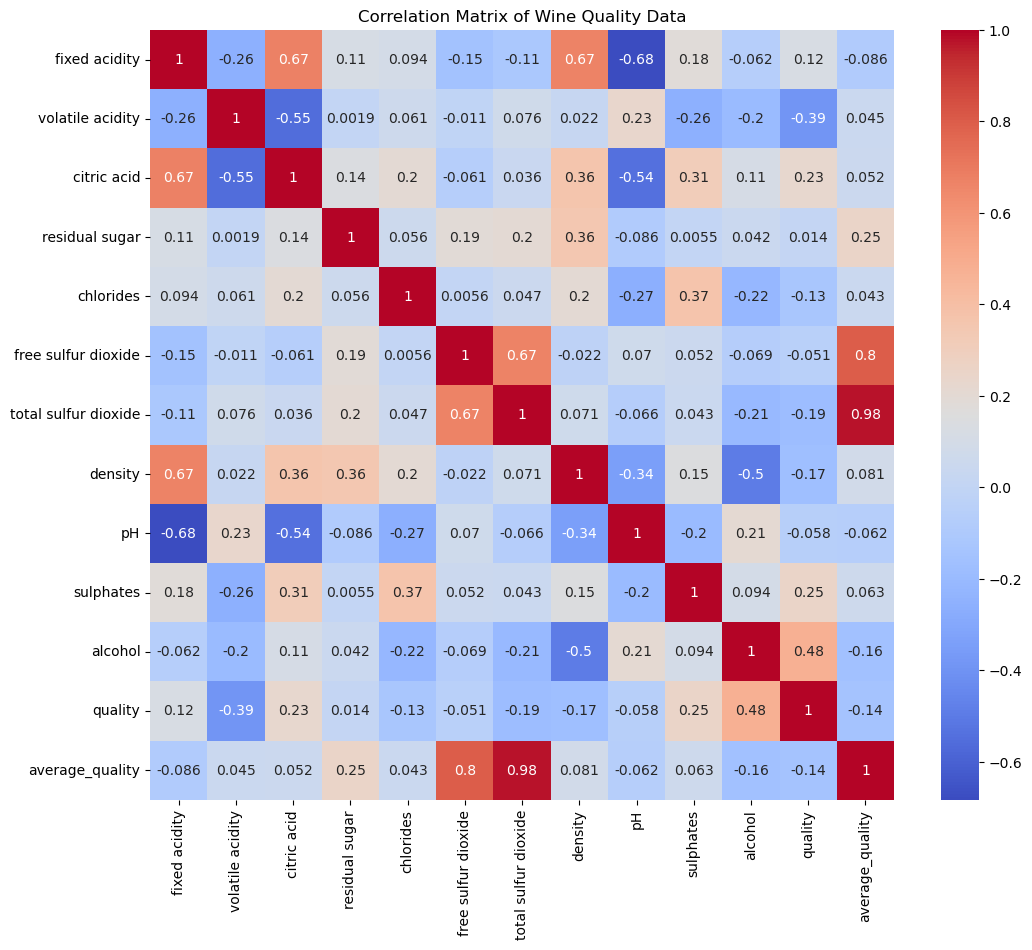

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix
corr = wine_quality_data.corr(numeric_only = True)

# Plot heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Wine Quality Data')

# Save the figure
plt.savefig('correlation_matrix.png', dpi = 300, bbox_inches = 'tight')

plt.show()

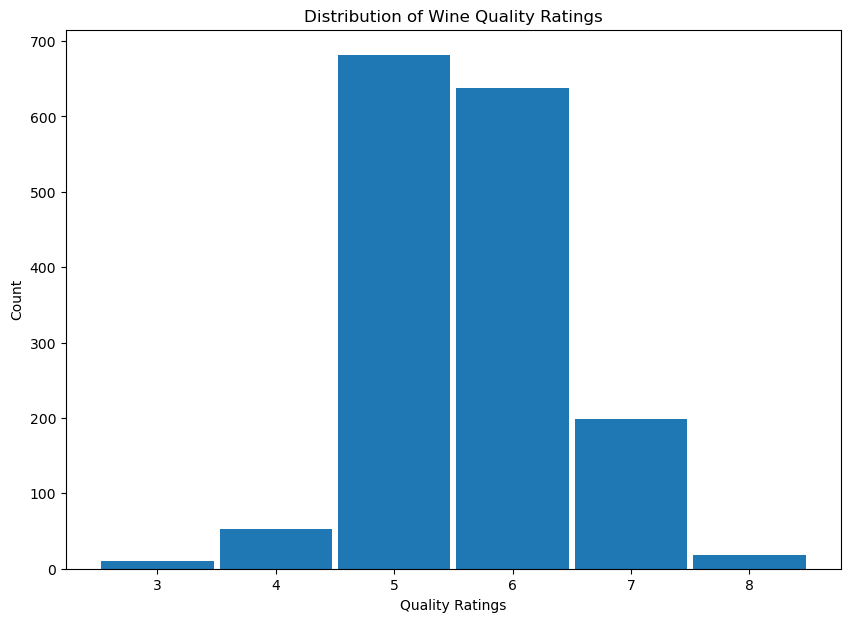

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize = (10, 7))
wine_quality_data['quality'].plot(kind = 'hist', rwidth = 0.95,
                                      bins = np.arange(2.5, 9))

plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Ratings')
plt.ylabel('Count')

# Adjust x-ticks
plt.xticks(np.arange(3, 9, step=1))

# Save the figure
plt.savefig('histogram_wine_quality_ratings.png', dpi = 300,
                                      bbox_inches = 'tight')
plt.show()